# opencv course
# A presentation by Mohammad Kahkeshani
### instagram:
#### codevision_academy
#### kahkeshani_mohammad

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Function for Draw

In [3]:
def draw_with_mouse(event, x, y, flags, param):
    global drawing, mask, clone
    
    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
    elif event == cv2.EVENT_MOUSEMOVE and drawing:
        cv2.circle(mask, (x, y), 10, 255, -1)          # روی ماسک
        cv2.circle(clone, (x, y), 10, (0, 0, 255), -1) # روی تصویر (قرمز)
    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False

### illumination change 

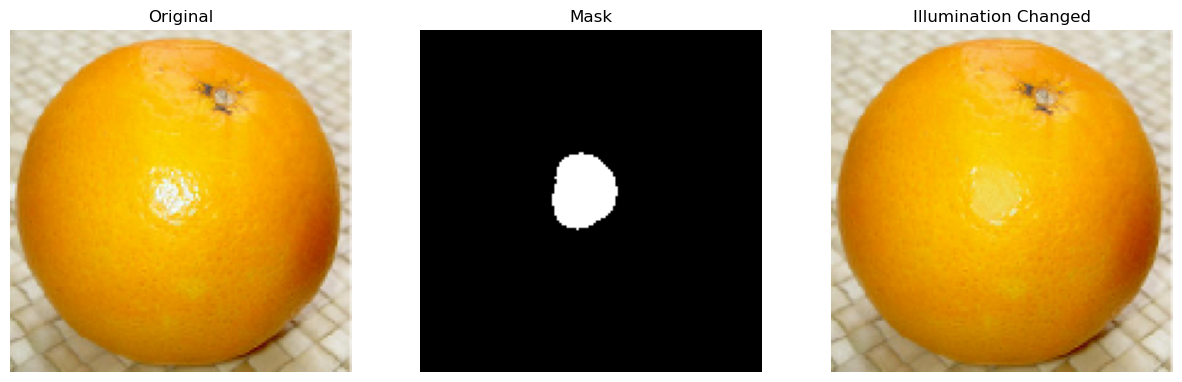

In [4]:
image = cv2.imread("images/orange.png")
clone = image.copy()


mask = np.zeros(image.shape[:2], dtype=np.uint8)

drawing = False
result = None

cv2.namedWindow("Draw mask")
cv2.setMouseCallback("Draw mask", draw_with_mouse)

while True:
    cv2.imshow("Draw mask", clone)
    cv2.imshow("Mask", mask)

    key = cv2.waitKey(1) & 0xFF
    if key == ord("l"):  
        result = cv2.illuminationChange(image, mask, alpha=1.5, beta=0.5)
        cv2.imshow("Result", result)
    elif key == ord("r"):  
        clone = image.copy()
        mask[:] = 0
        result = None
    elif key == 27:  
        break

cv2.destroyAllWindows()

if result is not None:
    plt.figure(figsize=(15,5))
    plt.subplot(131); plt.imshow(image[...,::-1]); plt.title("Original"); plt.axis("off")
    plt.subplot(132); plt.imshow(mask, cmap="gray"); plt.title("Mask"); plt.axis("off")
    plt.subplot(133); plt.imshow(result[...,::-1]); plt.title("Illumination Changed"); plt.axis("off")
    plt.show()
